<a href="https://colab.research.google.com/github/signLangProjectNIC/tf-cnn-lstm4/blob/main/tf_cnn_lstm4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#AIM HERE IS TO PROPERLY ANALYZE THE COSTS, GRADIENTS AND ALL

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
print("Tensorflow version " + tf.__version__)

try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

Tensorflow version 2.4.1
Running on TPU  ['10.92.53.138:8470']
INFO:tensorflow:Initializing the TPU system: grpc://10.92.53.138:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.92.53.138:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import numpy as np
X=np.load("/content/gdrive/MyDrive/hand sign database array X.npy")
Y=np.load("/content/gdrive/MyDrive/hand sign database array Y.npy")

In [4]:
import tensorflow as tf
import tensorflow.keras.layers as tfKL
from keras.layers import Activation, Dense 
from sklearn.model_selection import train_test_split



nLookback=4
height=50
width=50
channels=3
nCategories=8

In [5]:
print(np.shape(X))

(402, 20, 50, 50, 3)


In [6]:
testImage=X[0][0]

In [7]:
from PIL import Image as im

In [8]:
data=im.fromarray(testImage)

In [9]:
from matplotlib import pyplot as plt
# plt.imshow(data, interpolation='nearest')
# plt.show()

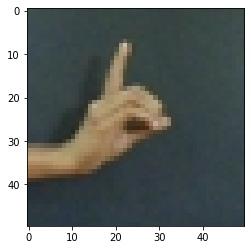

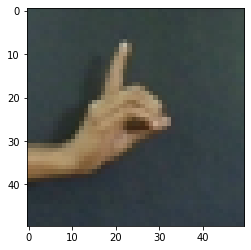

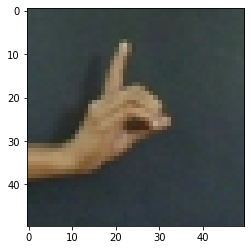

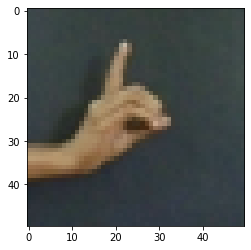

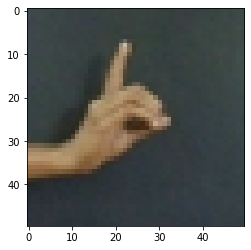

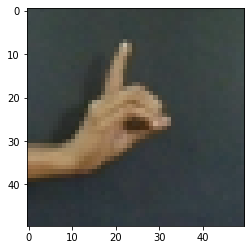

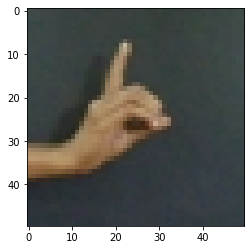

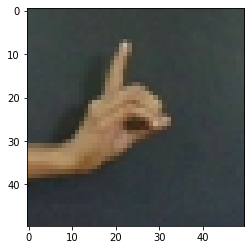

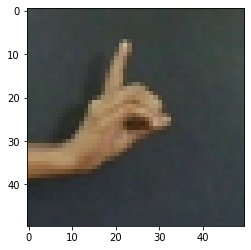

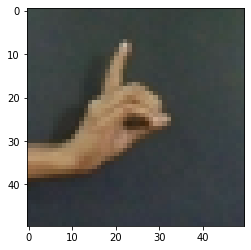

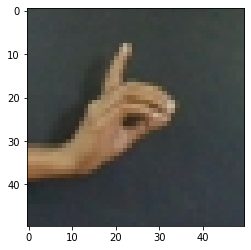

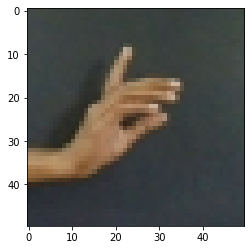

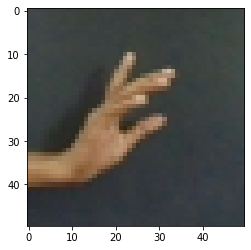

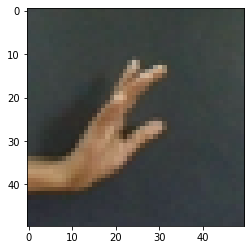

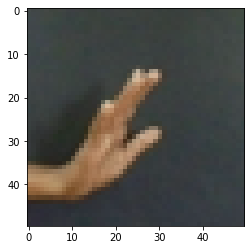

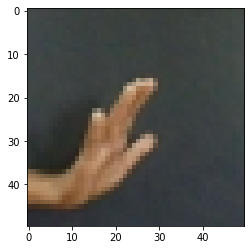

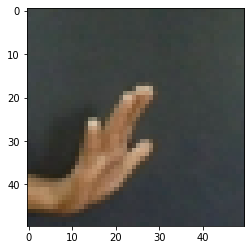

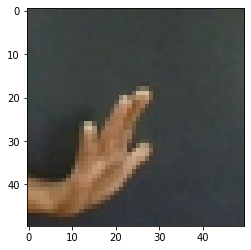

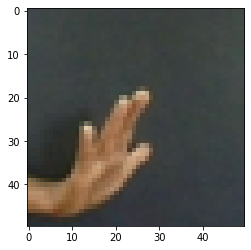

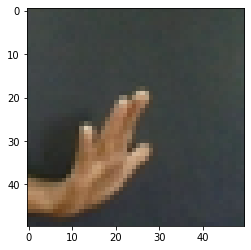

In [10]:
for j in range(20):
  data=im.fromarray(X[100][j])
  plt.imshow(data, interpolation='nearest')
  plt.show()

In [11]:
def createModel(weights=0):
  with tpu_strategy.scope():
    model=tf.keras.Sequential()
    model.add(tfKL.TimeDistributed(tfKL.Conv2D(filters=64,kernel_size=(3,3),activation='relu',trainable=True),input_shape=(None,nLookback,height,width,channels)))
    model.add(tfKL.TimeDistributed(tfKL.Dropout(0.5,trainable=True)))
    model.add(tfKL.TimeDistributed(tfKL.Conv2D(filters=64,kernel_size=(3,3),activation='relu',trainable=True)))
    model.add(tfKL.TimeDistributed(tfKL.Dropout(0.5,trainable=True)))

    model.add(tfKL.TimeDistributed(tfKL.MaxPooling3D(pool_size=(2,2,2),trainable=True)))
    model.add(tfKL.TimeDistributed(tfKL.Flatten(trainable=True)))


    model.add(tfKL.LSTM(units=100,activation='tanh',trainable=True))
    model.add(tfKL.Dropout(0.5,trainable=True))
    model.add(tfKL.Dense(units=100,activation='relu',trainable=True))
    model.add(tfKL.Dense(units=nCategories,activation='softmax',trainable=True))
    model.compile(metrics=['accuracy'],loss='categorical_crossentropy',optimizer='adam')
    i=0
    if weights!=0:
      for layer in model.layers:
        model.layers[i].set_weights(weights[i])
        i+=1
    return model

In [12]:
def sameLists(l1,l2):
  i=0
  for li1 in l1:
    j=0
    for li2 in li1:
      change=l1[i][j]-l2[i][j]
      answer=np.count_nonzero(change)
      if answer>0:
        return False
      j+=1
    i+=1
  return True

In [13]:
#NOW LETS MAKE THE FUNCTION evaluateModel():
import random
import pandas as pd

def evaluateModel(X,Y,nSubsequences=5,nLookback=4,nCategories=8,train_size=0.8,weights=0,verbose=0,epochs=30,val_prop=(20/90)):
  with tpu_strategy.scope():
    trainX, testX, trainY, testY = train_test_split(X, Y, train_size=train_size, random_state=random.randint(1,100000))
    # trainX, testX, trainY, testY = train_test_split(X, Y, train_size=train_size, random_state=24)
    # print(trainY)
  
  verbose=verbose
  epochs=epochs
  batch_size=10

  
  height=trainX.shape[2]
  width=trainX.shape[3]
  channels=trainX.shape[4]
  trainX=trainX.reshape((trainX.shape[0],nSubsequences,nLookback,trainX.shape[2],trainX.shape[3],trainX.shape[4]))
  testX=testX.reshape((testX.shape[0],nSubsequences,nLookback,testX.shape[2],testX.shape[3],testX.shape[4]))
  trainY=tf.keras.utils.to_categorical(trainY)
  testY=tf.keras.utils.to_categorical(testY)
  accuracy=0
  model=createModel(weights=weights)
  with tpu_strategy.scope():
    history=model.fit(trainX,trainY,batch_size=batch_size,epochs=epochs,verbose=verbose,validation_split =val_prop)
    
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

    _,accuracy=model.evaluate(testX,testY,verbose=0,batch_size=batch_size)
    newweights=list()
    for layer in model.layers:
      newweights.append(layer.get_weights())
    #check wether the weights changed or not
    # if weights!=0:
    #   same=sameLists(newweights,weights)
    #   if same==True:
    #     print("No changes in weight")
    #   else:
    #     print("Weights changed!!")
    weights=newweights
    # print("Weights now: ")
    # print(np.shape(weights))
  return accuracy,weights

In [14]:
def summarizeScores(scores):
  print("Scores: ",scores)
  m,s=np.mean(scores),np.std(scores)
  x=[i for i in range(np.shape(scores)[0])]
  plt.plot(x,scores)
  
  plt.xlabel('Run')
  plt.ylabel('Accuracy')
  
  plt.show()
  print('Accuracy: %.3f%% (+/-%.3f)' % (m, s))

In [12]:
def runExperiments(X,Y,train_size=0.8,run=10,epochs=30):#weights are changing for each run in experiment we can transfer weights accross experiments too but we are not doing that right now
  # trainX,trainY,testX,testY=loadDataset(prefix)
  scores=list()
  weights=0
  for r in range(run):
    score,newweights=evaluateModel(X,Y,train_size=train_size,weights=weights,epochs=epochs)
    if weights!=0:
      same=sameLists(newweights,weights)
      if same==True:
        print("No change in weights")
      else:
        print("Weights changed!!")
    weights=newweights
    score*=100.0
    scores.append(score)
    print('>#%d: %.3f' % (r+1, score))
  summarizeScores(scores)
  print("--------------------------------------------------------------------------------------------------------------------------")

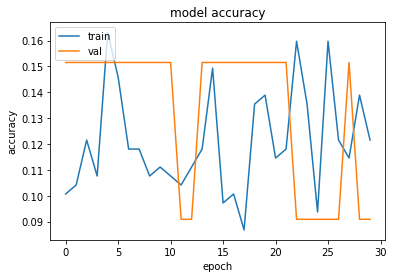

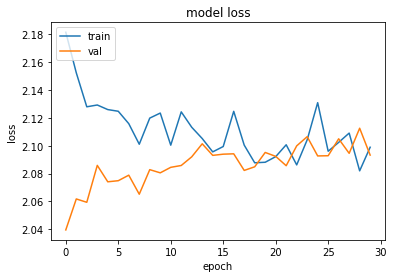

>#1: 13.580


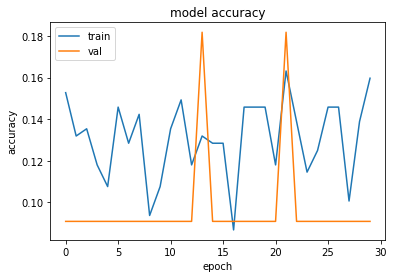

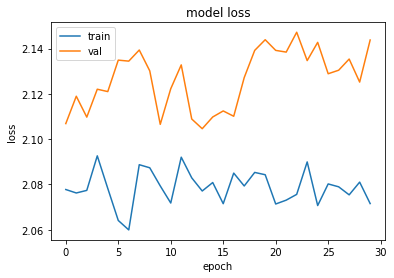

Weights changed!!
>#2: 8.642


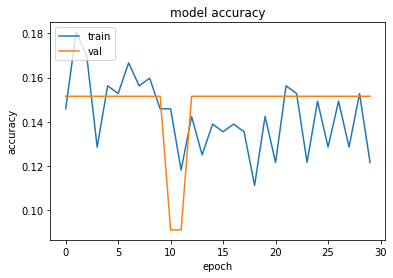

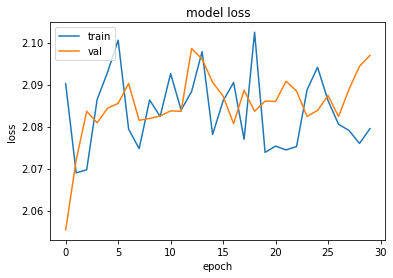

Weights changed!!
>#3: 3.704


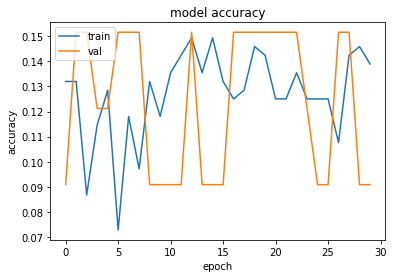

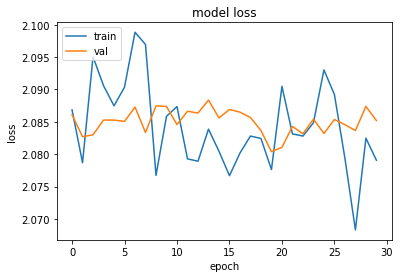

Weights changed!!
>#4: 9.877


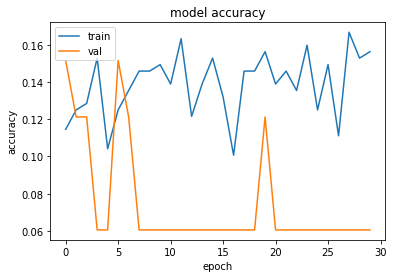

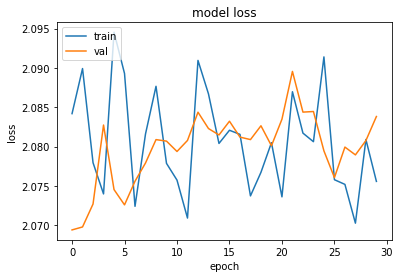

Weights changed!!
>#5: 6.173


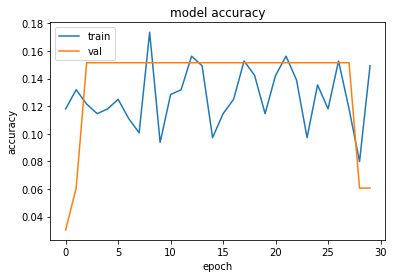

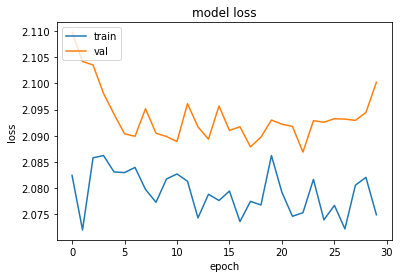

Weights changed!!
>#6: 17.284


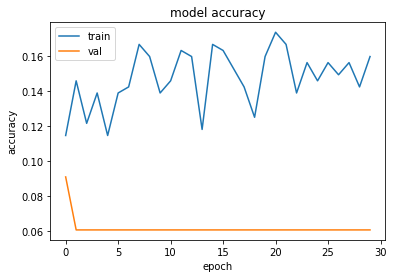

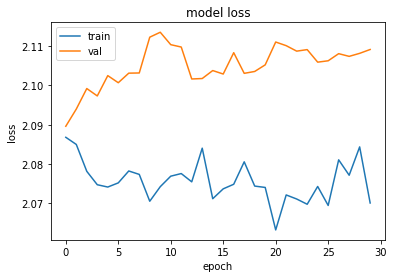

Weights changed!!
>#7: 6.173


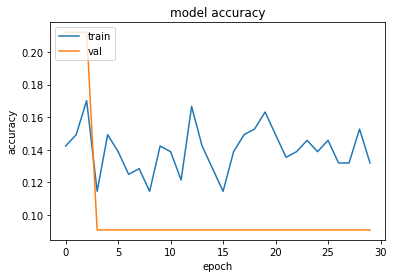

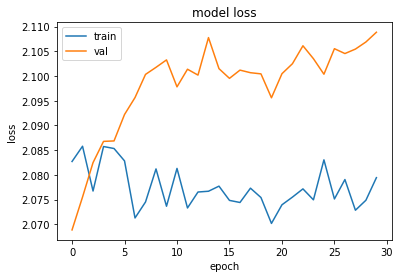

Weights changed!!
>#8: 6.173


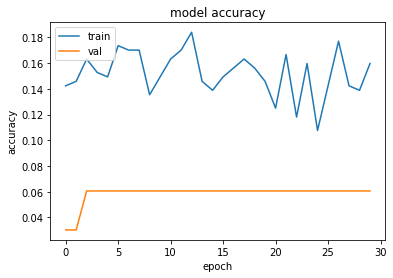

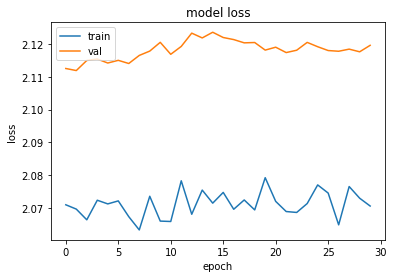

Weights changed!!
>#9: 7.407


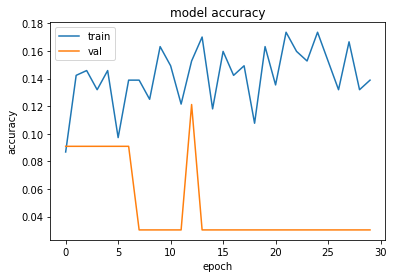

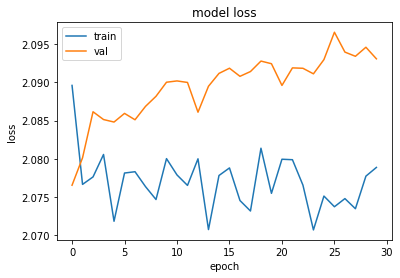

Weights changed!!
>#10: 11.111


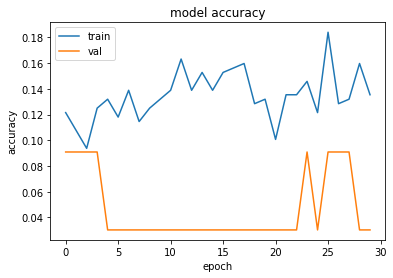

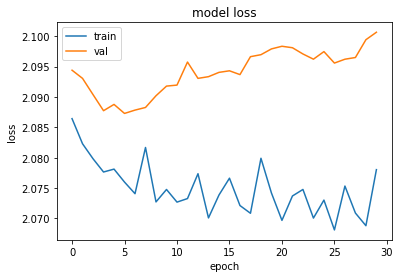

Weights changed!!
>#11: 12.346


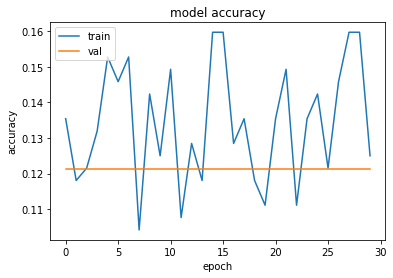

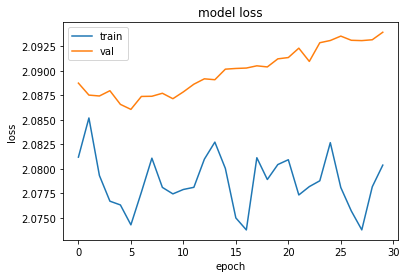

Weights changed!!
>#12: 11.111


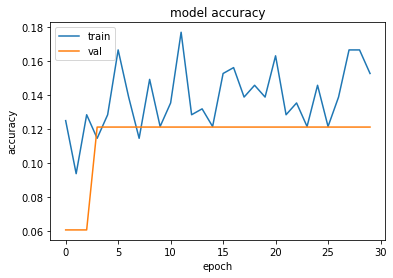

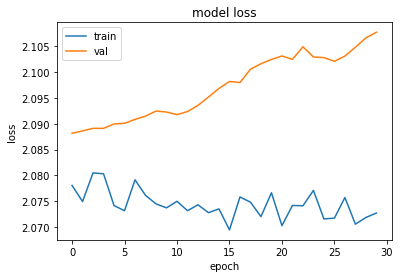

Weights changed!!
>#13: 3.704


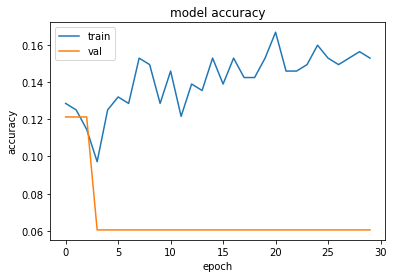

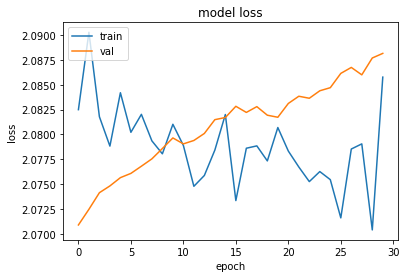

Weights changed!!
>#14: 7.407


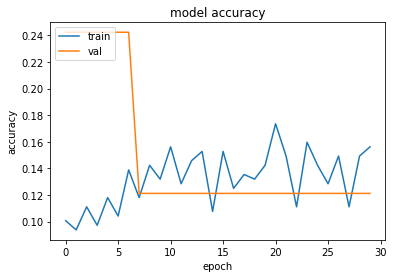

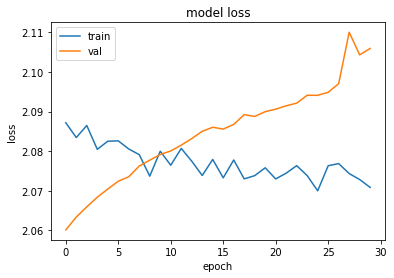

Weights changed!!
>#15: 8.642


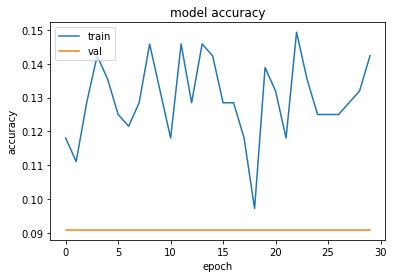

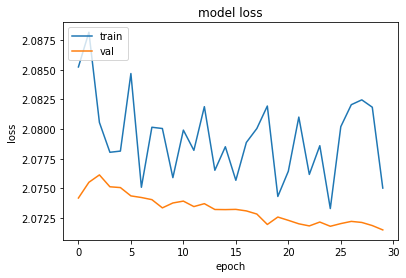

Weights changed!!
>#16: 12.346


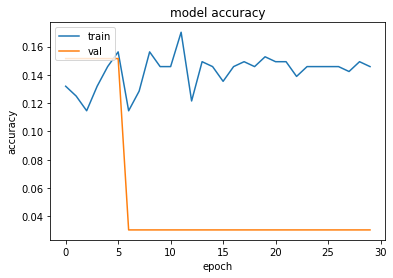

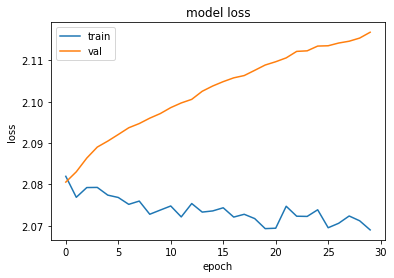

Weights changed!!
>#17: 9.877


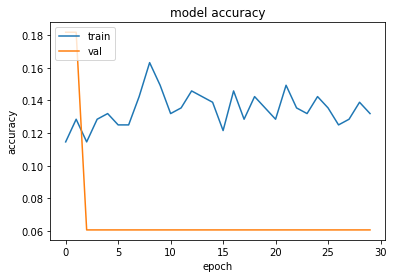

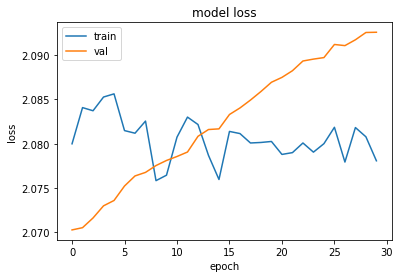

Weights changed!!
>#18: 12.346


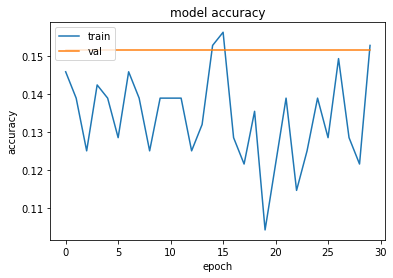

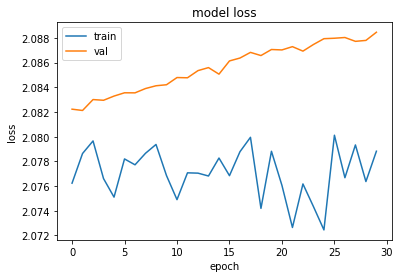

Weights changed!!
>#19: 9.877


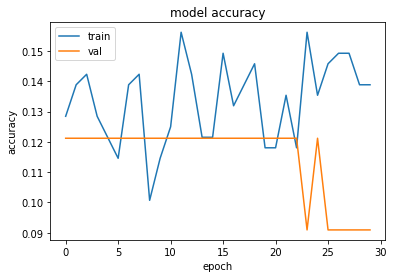

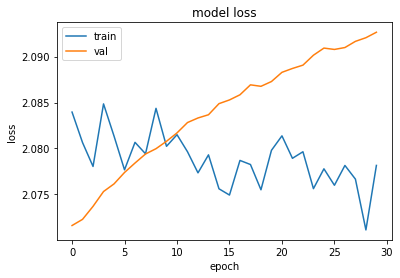

Weights changed!!
>#20: 9.877


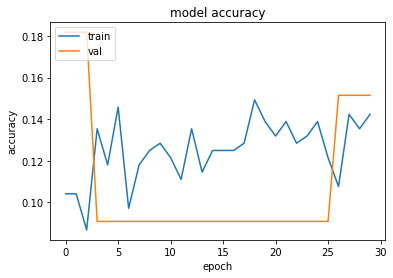

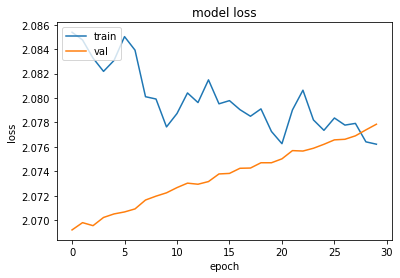

Weights changed!!
>#21: 6.173


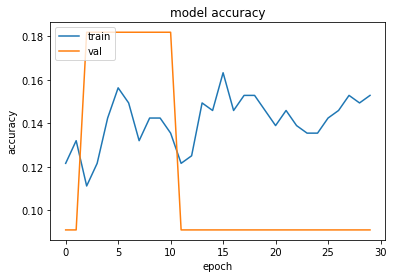

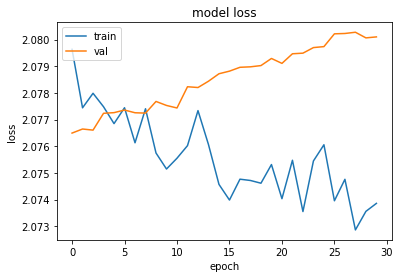

Weights changed!!
>#22: 7.407


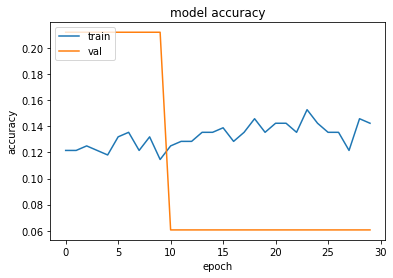

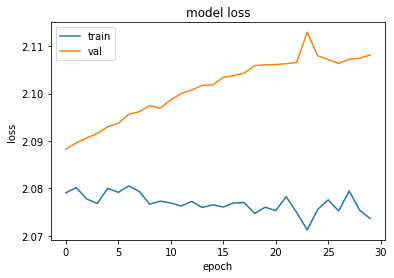

Weights changed!!
>#23: 13.580


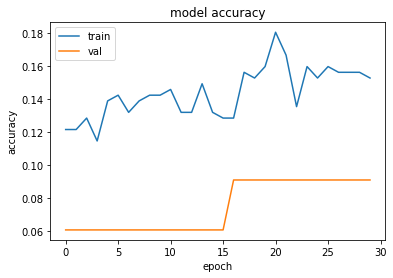

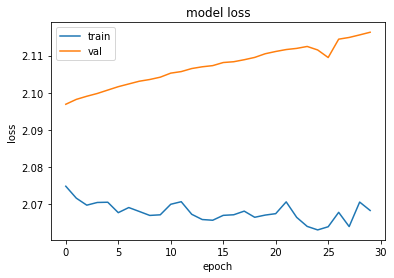

Weights changed!!
>#24: 4.938


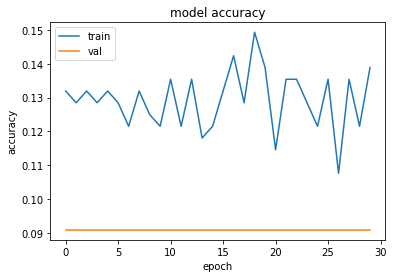

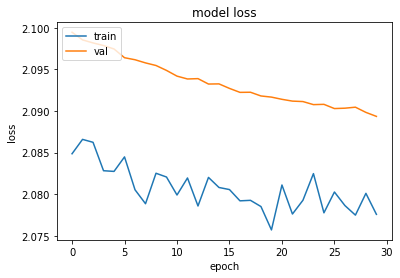

Weights changed!!
>#25: 13.580


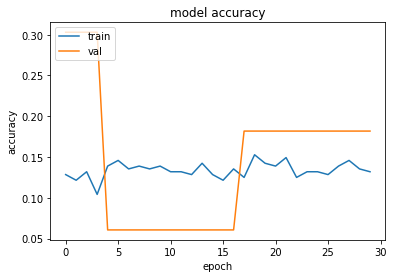

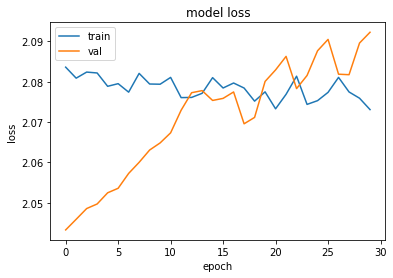

Weights changed!!
>#26: 6.173


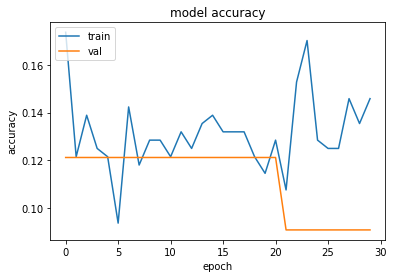

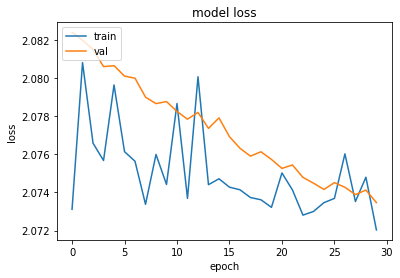

Weights changed!!
>#27: 11.111


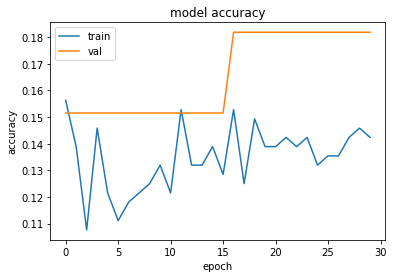

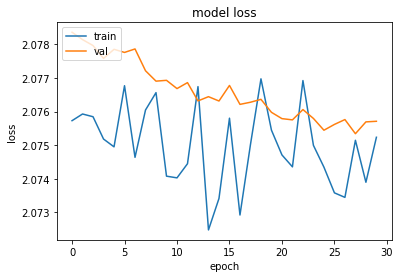

Weights changed!!
>#28: 6.173


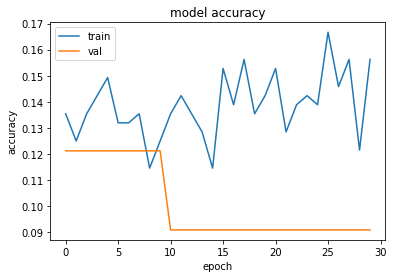

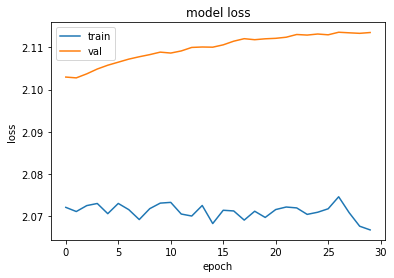

Weights changed!!
>#29: 11.111


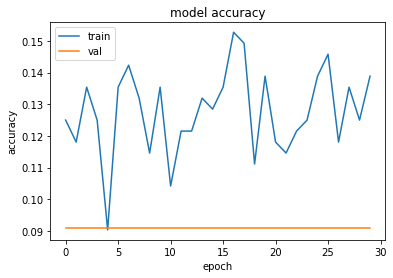

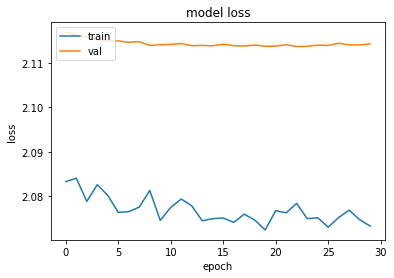

Weights changed!!
>#30: 13.580


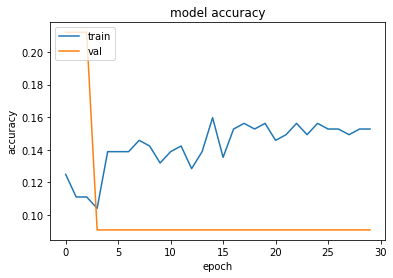

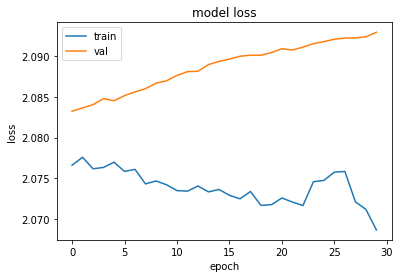

Weights changed!!
>#31: 6.173


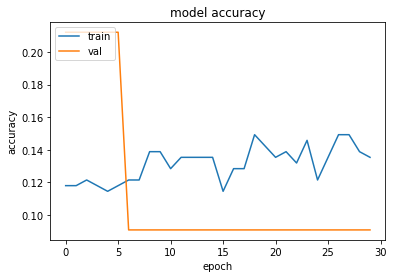

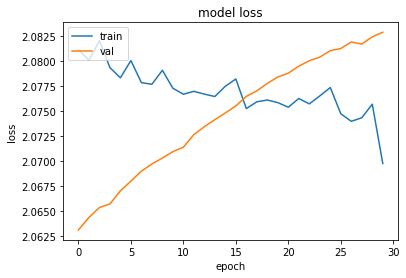

Weights changed!!
>#32: 9.877


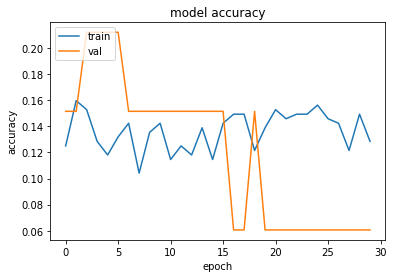

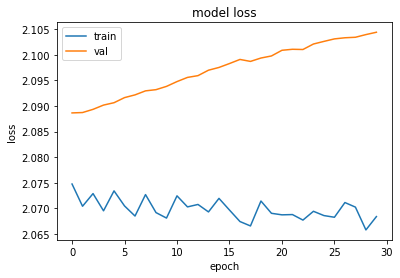

Weights changed!!
>#33: 9.877


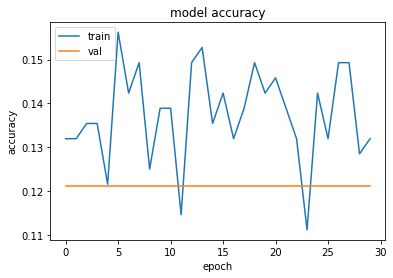

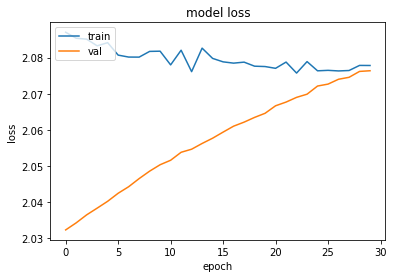

Weights changed!!
>#34: 9.877


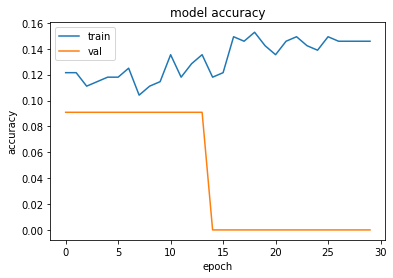

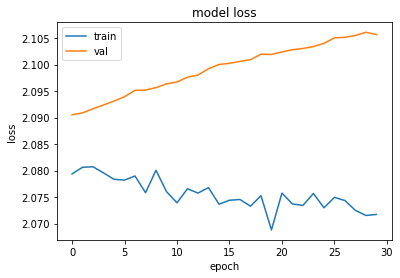

Weights changed!!
>#35: 12.346


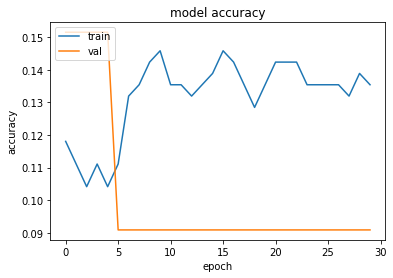

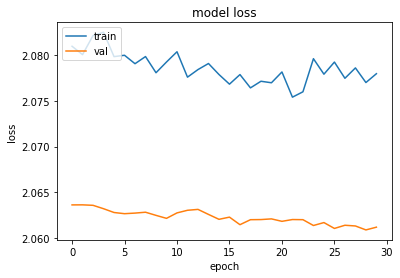

Weights changed!!
>#36: 11.111


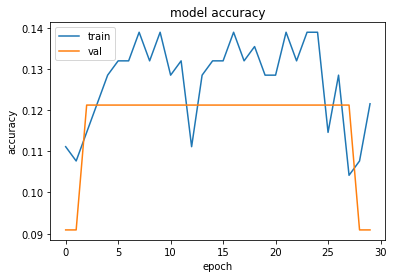

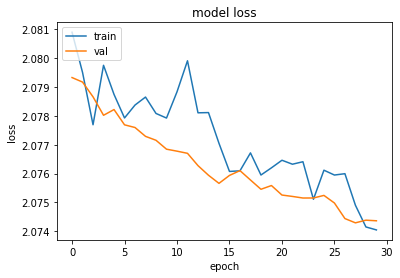

Weights changed!!
>#37: 11.111


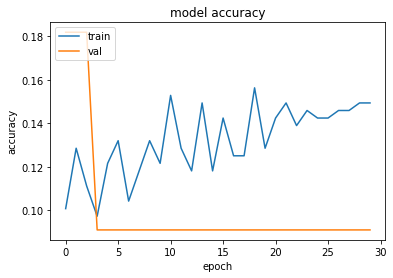

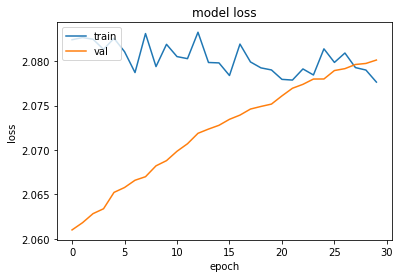

Weights changed!!
>#38: 8.642


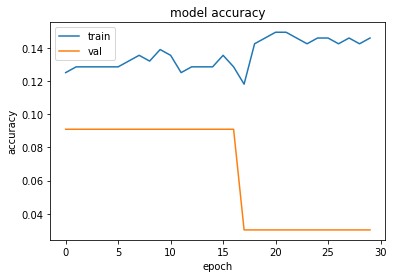

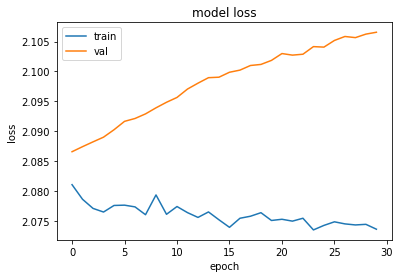

Weights changed!!
>#39: 11.111


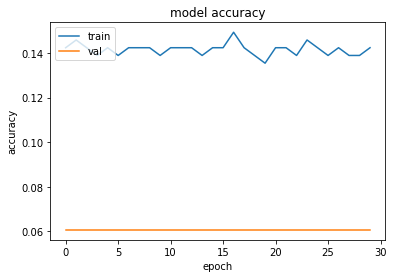

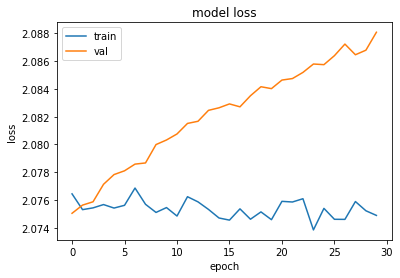

Weights changed!!
>#40: 11.111
Scores:  [13.58024775981903, 8.641976118087769, 3.7037041038274765, 9.876544028520584, 6.172839924693108, 17.283952236175537, 6.172839924693108, 6.172839924693108, 7.407408207654953, 11.1111119389534, 12.345679849386215, 11.1111119389534, 3.7037041038274765, 7.407408207654953, 8.641976118087769, 12.345679849386215, 9.876544028520584, 12.345679849386215, 9.876544028520584, 9.876544028520584, 6.172839924693108, 7.407408207654953, 13.58024775981903, 4.938272014260292, 13.58024775981903, 6.172839924693108, 11.1111119389534, 6.172839924693108, 11.1111119389534, 13.58024775981903, 6.172839924693108, 9.876544028520584, 9.876544028520584, 9.876544028520584, 12.345679849386215, 11.1111119389534, 11.1111119389534, 8.641976118087769, 11.1111119389534, 11.1111119389534]


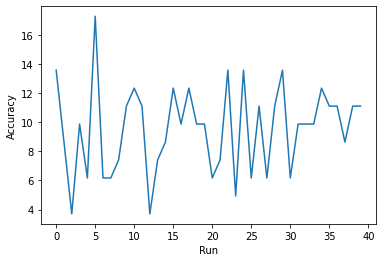

Accuracy: 9.568% (+/-3.008)
--------------------------------------------------------------------------------------------------------------------------


In [69]:
with tpu_strategy.scope():
  # runExperiments(X,Y,train_size=0.6,run=20)
  # print("-----------------------------------")
  # runExperiments(X,Y,train_size=0.7,run=20)
  # print("-----------------------------------")
  # runExperiments(X,Y,train_size=0.8,run=20)
  # print("-----------------------------------")
  runExperiments(X,Y,train_size=0.8,run=40)

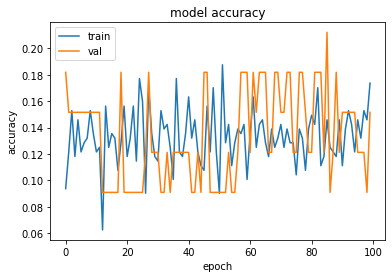

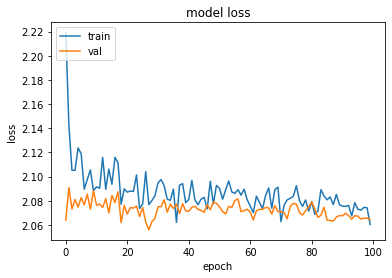

>#1: 14.815
Scores:  [14.814816415309906]


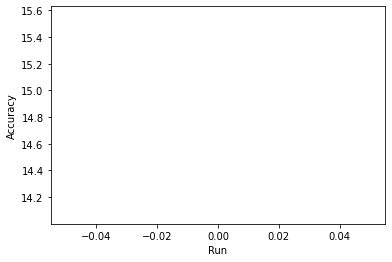

Accuracy: 14.815% (+/-0.000)
--------------------------------------------------------------------------------------------------------------------------


In [70]:
with tpu_strategy.scope():
  runExperiments(X,Y,train_size=0.8,run=1,epochs=100)

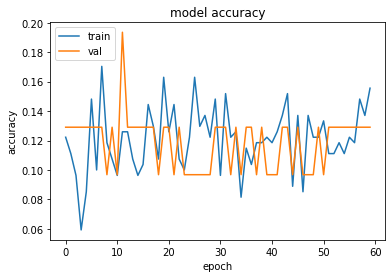

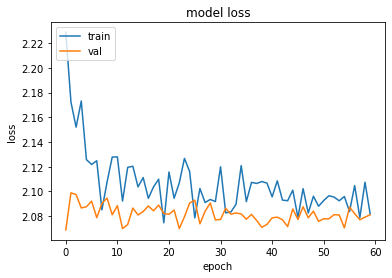

>#1: 9.901


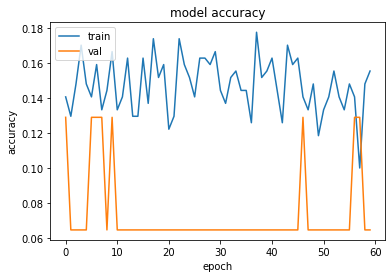

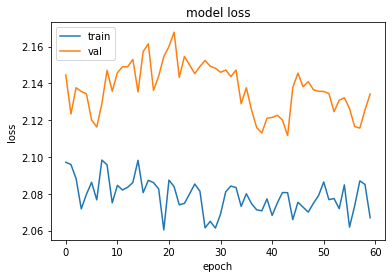

Weights changed!!
>#2: 6.931


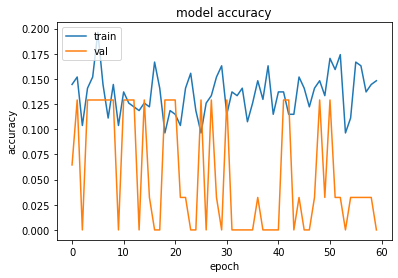

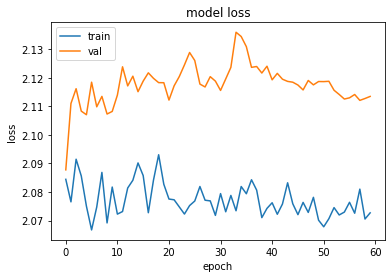

Weights changed!!
>#3: 12.871


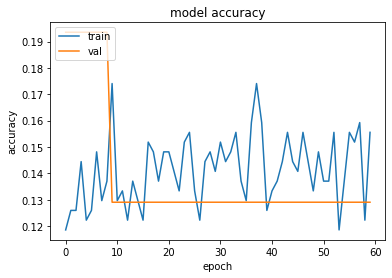

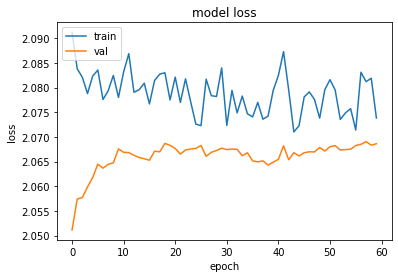

Weights changed!!
>#4: 7.921


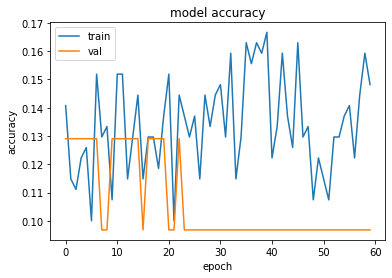

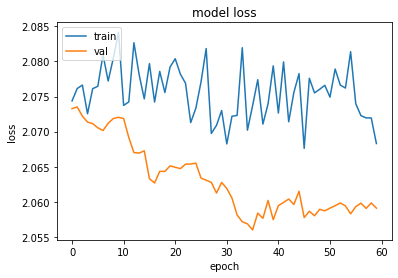

Weights changed!!
>#5: 10.891
Scores:  [9.90099012851715, 6.9306932389736176, 12.871286273002625, 7.920791953802109, 10.891088843345642]


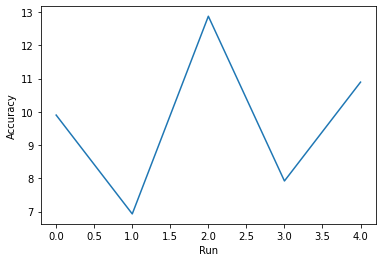

Accuracy: 9.703% (+/-2.114)
--------------------------------------------------------------------------------------------------------------------------


In [71]:
with tpu_strategy.scope():
  runExperiments(X,Y,train_size=0.75,run=5,epochs=60)

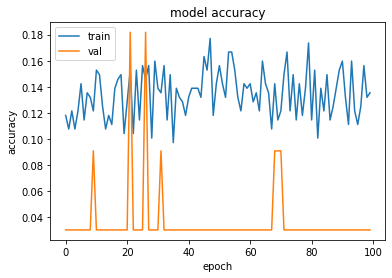

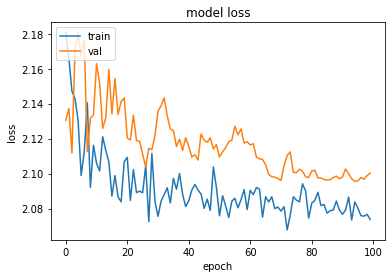

>#1: 11.111


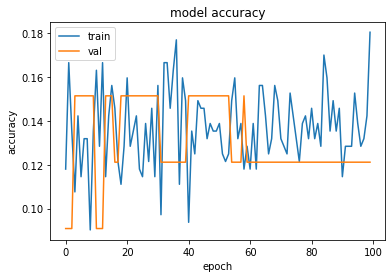

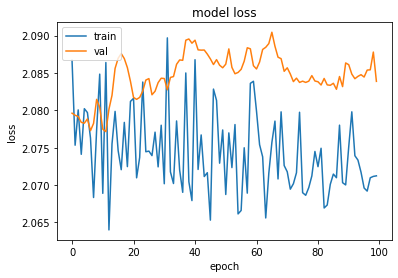

Weights changed!!
>#2: 8.642


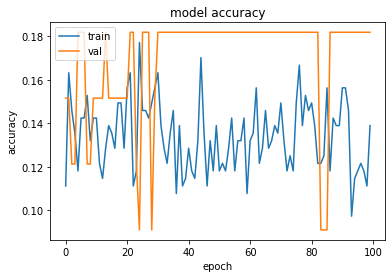

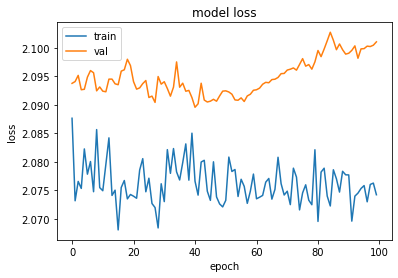

Weights changed!!
>#3: 8.642


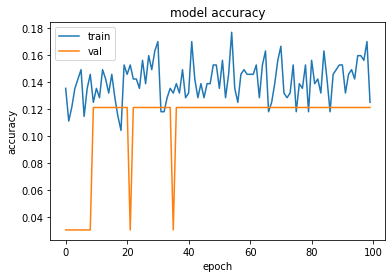

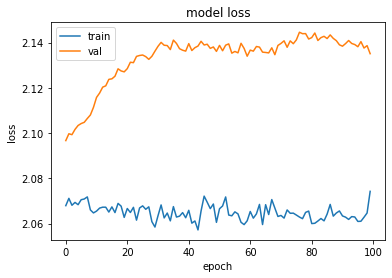

Weights changed!!
>#4: 7.407


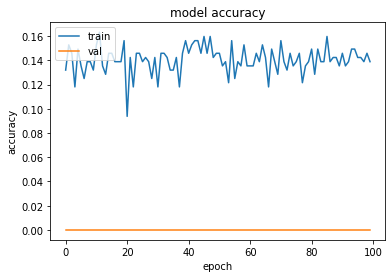

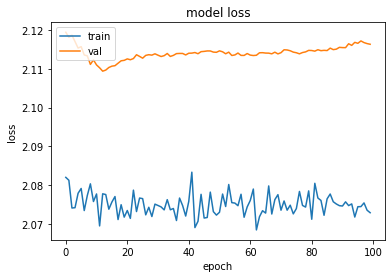

Weights changed!!
>#5: 13.580


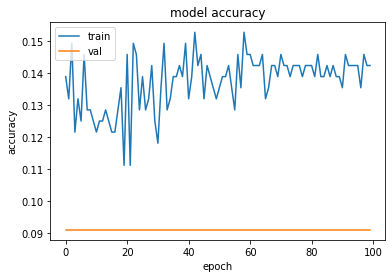

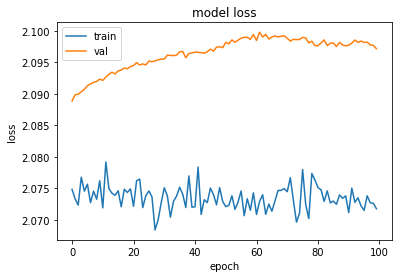

Weights changed!!
>#6: 9.877


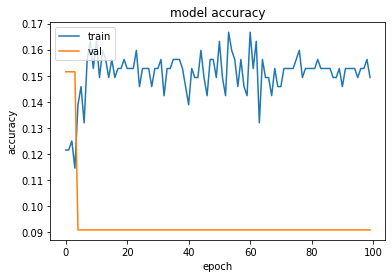

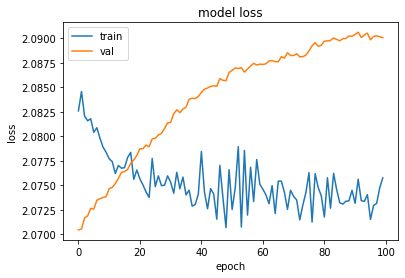

Weights changed!!
>#7: 6.173


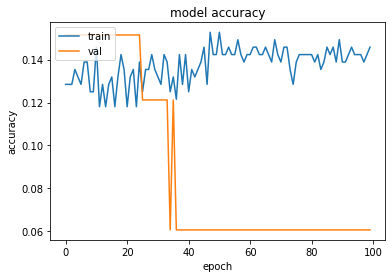

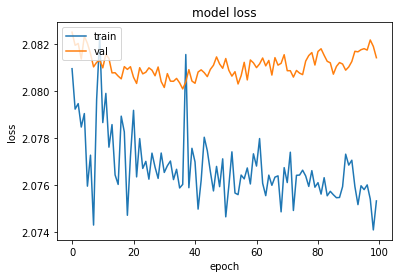

Weights changed!!
>#8: 8.642


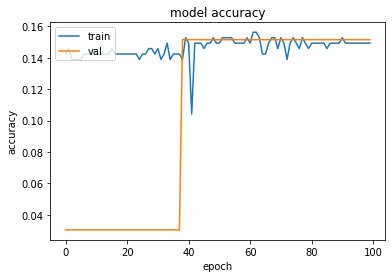

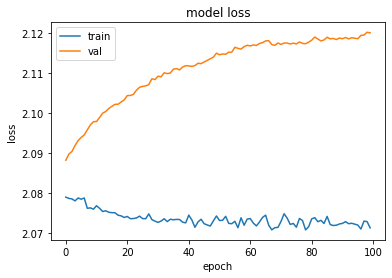

Weights changed!!
>#9: 4.938


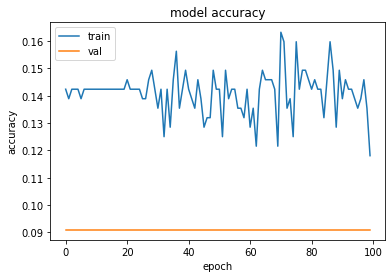

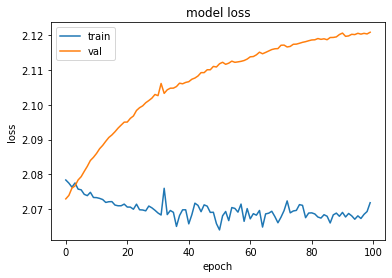

Weights changed!!
>#10: 9.877
Scores:  [11.1111119389534, 8.641976118087769, 8.641976118087769, 7.407408207654953, 13.58024775981903, 9.876544028520584, 6.172839924693108, 8.641976118087769, 4.938272014260292, 9.876544028520584]


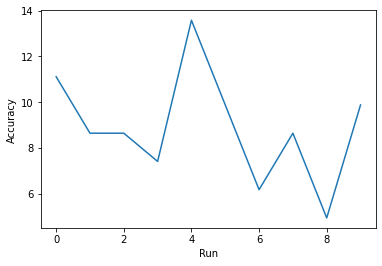

Accuracy: 8.889% (+/-2.329)
--------------------------------------------------------------------------------------------------------------------------


In [72]:
with tpu_strategy.scope():
  runExperiments(X,Y,train_size=0.8,run=10,epochs=100)

In [74]:
#using weights previously learnt doesn't seem to help

In [15]:
def runExperiments2(X,Y,train_size=0.8,run=10,epochs=30,verbose=0,val_prop=(20/90)):#weights are changing for each run in experiment we can transfer weights accross experiments too but we are not doing that right now
  # trainX,trainY,testX,testY=loadDataset(prefix)
  scores=list()
  weights=0
  for r in range(run):
    score,newweights=evaluateModel(X,Y,train_size=train_size,weights=0,epochs=epochs,val_prop=val_prop)
    if weights!=0:
      same=sameLists(newweights,weights)
      if same==True:
        print("No change in weights")
      else:
        print("Weights changed!!")
    weights=newweights
    score*=100.0
    scores.append(score)
    print('>#%d: %.3f' % (r+1, score))
  summarizeScores(scores)
  print("--------------------------------------------------------------------------------------------------------------------------")

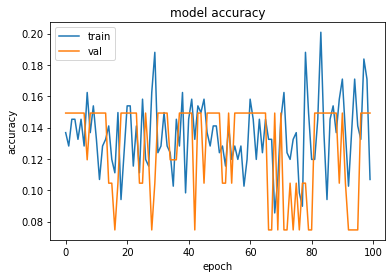

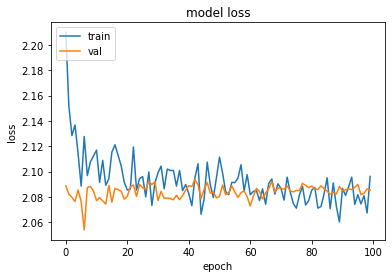

>#1: 7.921


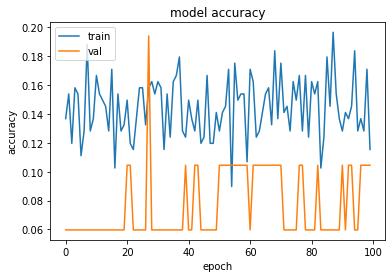

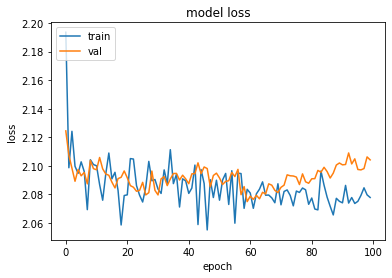

Weights changed!!
>#2: 8.911


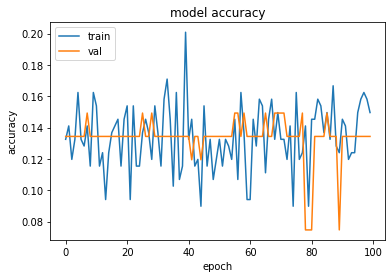

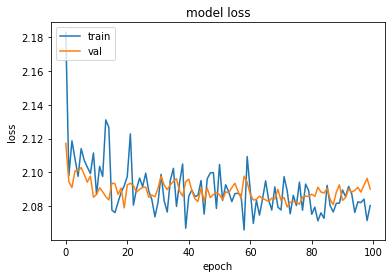

Weights changed!!
>#3: 11.881


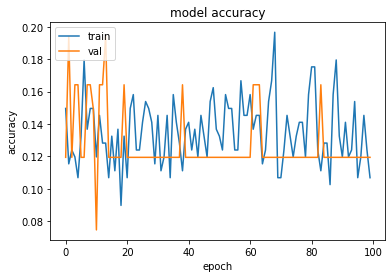

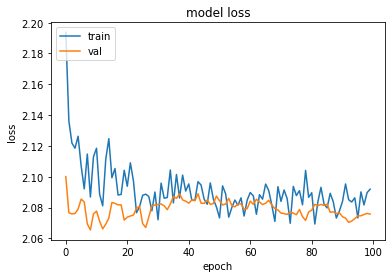

Weights changed!!
>#4: 8.911


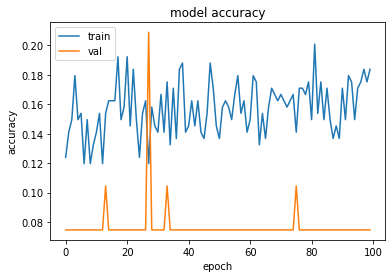

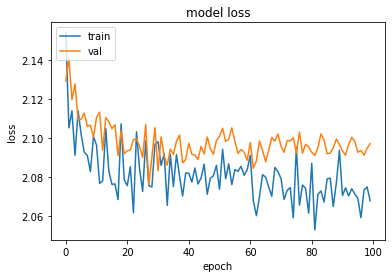

Weights changed!!
>#5: 6.931


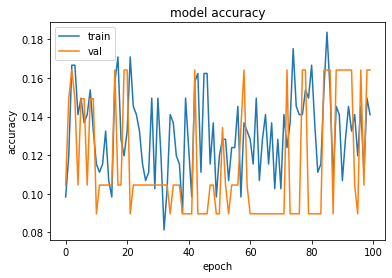

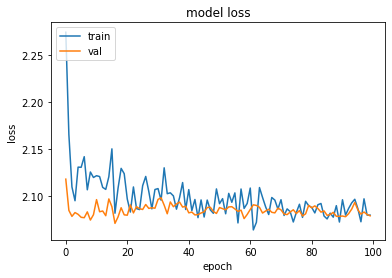

Weights changed!!
>#6: 12.871


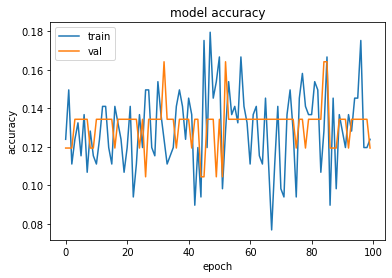

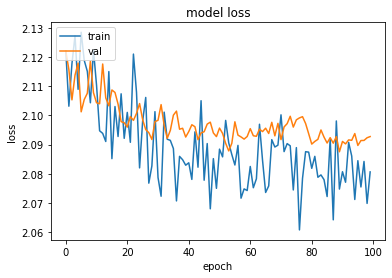

Weights changed!!
>#7: 9.901


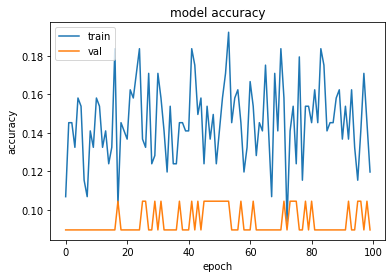

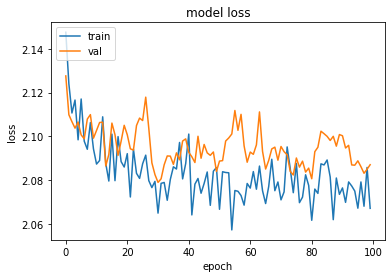

Weights changed!!
>#8: 8.911


In [ ]:
with tpu_strategy.scope():
  runExperiments2(X,Y,train_size=0.75,run=10,epochs=100)

In [ ]:
with tpu_strategy.scope():
  runExperiments2(X,Y,train_size=0.75,run=2,epochs=200)

In [ ]:
with tpu_strategy.scope():
  runExperiments2(X,Y,train_size=0.75,run=5,epochs=25)
  runExperiments2(X,Y,train_size=0.75,run=5,epochs=200)

In [ ]:
#it seems a little bit of overfitting is taking place